In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.metrics import precision_score, accuracy_score
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


data = pd.read_csv('/home/abc/Downloads/CpuLogData.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/prayas2409/logs/master/CpuLogData.csv')
data['Dates'] = pd.to_datetime(data['DateTime']).dt.date
data['Time'] = pd.to_datetime(data['DateTime']).dt.time

feature_eng_col = ['Cpu Working Time', 'Cpu idle Time', 'number of software interrupts since boot'
                   ,'number of interrupts since boot', 'disk_read_count', 'disk_write_count'
                   ,'disk_read_bytes', 'disk_write_bytes', 'time spent reading from disk'
                   ,'time spent writing to disk', 'time spent doing actual I/Os'
                   ,'number of bytes sent', 'number of bytes received'
                   ,'number of packets sent', 'number of packets recived']

# To be checked again

# Remove constant data
constant_col = ['Cpu Count', 'Usage Cpu Count ', 'number of system calls since boot'
                , 'system_total_memory', 'total number of errors while receiving'
                ,'total number of errors while sending','total number of incoming packets which were dropped'
                ,'total number of outgoing packets which were dropped', 'disk_total_memory']

# Remove Inter dependent data
inter_dependet_cols = ['system_free_memory', 'disk_free_memory', 'system_avalible_memory', 'system_used_memory']

# Remove object data 
object_col = ['DateTime', 'Dates', 'Time', 'boot_time']

def remove_col(data,col_list):
    data.drop(columns=col_list, inplace=True)
    return data
data = remove_col(data, inter_dependet_cols)
# data.columns
data = remove_col(data, constant_col)

def feature_engineering(feature_eng_col, data):    
    user_name = data['user_name'].unique()
    final_df = pd.DataFrame()
    # print(user_name)
    for u_name in user_name:
        df = data[data['user_name'] == u_name]
        df.sort_values('DateTime', inplace=True)
        df.reset_index(drop=True, inplace=True)
        for col in feature_eng_col:
            l1 =[]
            l1.append(df[col].iloc[0])
            for index in range(1,len(df)):

                if (df["Dates"].iloc[index] == df["Dates"].iloc[index-1]):
                    # As when curr smaller than prev
                    if (df[col].iloc[index]-df[col].iloc[index-1]) <= 0:
                        l1.append(df[col].iloc[index])
                        # curr > prev
                    elif (df[col].iloc[index]-df[col].iloc[index-1]) > 0:
                        l1.append(df[col].iloc[index]-df[col].iloc[index-1])
                else:
                    l1.append(df[col].iloc[index])
            df[col+"_fe"]=l1
        final_df = final_df.append(df)
        for col in feature_eng_col:
            final_df.drop(columns=col, inplace=True)
    return final_df

final_df = feature_engineering(feature_eng_col, data)
# final_df.drop(columns=object_col,inplace=True)
data.shape, final_df.shape

((4761, 34), (4761, 34))

In [2]:
perform = ["rahilstar11@gmail.com", "markfernandes66@gmail.com","deepshukla292@gmail.com","gaurav23091996@gmail.com","iamnzm@outlook.com"]
chal = ["sharlawar77@gmail.com","salinabodale73@gmail.com","bhagyashrichalke21@gmail.com","someshj5@gmail.com","damodharn21@gmail.com"]

In [3]:
final_df["status"]=1
for each in chal:
    final_df["status"].loc[final_df["user_name"]==each]=0

In [4]:
one_hot_encoded_cols=final_df['technology'].unique()

In [5]:
def one_hot_techo(df):
    le = LabelEncoder()
    oe = OneHotEncoder()
    tech_nums=le.fit_transform(df['technology'])
    oe.fit(np.array(tech_nums).reshape(-1, 1))
    abc = oe.transform(np.array(tech_nums).reshape(-1, 1)).toarray()
    techs=data['technology'].unique()
    techs.sort()
    print(techs)
    for index in range(len(techs)):
        if index<(len(techs)-1):
            df[techs[index]]=abc[:,index]
    
    return df
new=one_hot_techo(final_df)

['java' 'php' 'python']


In [ ]:
from sklearn.preprocessing import RobustScaler
def std(input_df):
    # standardize the data attributes
    object_df=pd.DataFrame() 
    for col in input_df.columns:
        if input_df[col].dtype == 'object' or (col=='status') or (col in one_hot_encoded_cols):
            object_df[col] = input_df[col]
            input_df=input_df.drop(columns=col)
    rs = RobustScaler()
    standardized_X = rs.fit_transform(input_df)
    new_data = pd.DataFrame(standardized_X, columns=input_df.columns)
    for col in object_df.columns:
        print(col)
        if col not in new_data.columns:
            new_data = new_data.reset_index(drop=True)
            object_df=object_df.reset_index(drop=True)
            new_data[col]=object_df[col]
    print(object_df.columns,new_data.columns)
#     return new_data
new_data = std(final_df)

In [6]:
new.columns

Index(['Cpu Working Time_fe', 'Cpu idle Time_fe', 'DateTime', 'Dates', 'Time',
       'boot_time', 'cpu avg load over 1 min', 'cpu avg load over 15 min',
       'cpu avg load over 5 min', 'cpu_percent', 'disk_read_bytes_fe',
       'disk_read_count_fe', 'disk_used_memory', 'disk_write_bytes_fe',
       'disk_write_count_fe', 'files_changed', 'keyboard', 'mouse',
       'number of bytes received_fe', 'number of bytes sent_fe',
       'number of interrupts since boot_fe', 'number of packets recived_fe',
       'number of packets sent_fe',
       'number of software interrupts since boot_fe', 'system_active_memory',
       'system_buffers_memory', 'system_cached_memory',
       'system_inactive_memory', 'system_shared_memory', 'technology',
       'time spent doing actual I/Os_fe', 'time spent reading from disk_fe',
       'time spent writing to disk_fe', 'user_name', 'status', 'java', 'php'],
      dtype='object')

In [9]:
new_data.head()

In [10]:
avg_df=pd.DataFrame(new_data.groupby(["user_name","Dates"]).mean())
avg_df.columns

Index(['Cpu Working Time_fe', 'Cpu idle Time_fe', 'cpu avg load over 1 min',
       'cpu avg load over 15 min', 'cpu avg load over 5 min', 'cpu_percent',
       'disk_read_bytes_fe', 'disk_read_count_fe', 'disk_used_memory',
       'disk_write_bytes_fe', 'disk_write_count_fe', 'files_changed',
       'keyboard', 'mouse', 'number of bytes received_fe',
       'number of bytes sent_fe', 'number of interrupts since boot_fe',
       'number of packets recived_fe', 'number of packets sent_fe',
       'number of software interrupts since boot_fe', 'system_active_memory',
       'system_buffers_memory', 'system_cached_memory',
       'system_inactive_memory', 'system_shared_memory',
       'time spent doing actual I/Os_fe', 'time spent reading from disk_fe',
       'time spent writing to disk_fe', 'status', 'java', 'php'],
      dtype='object')

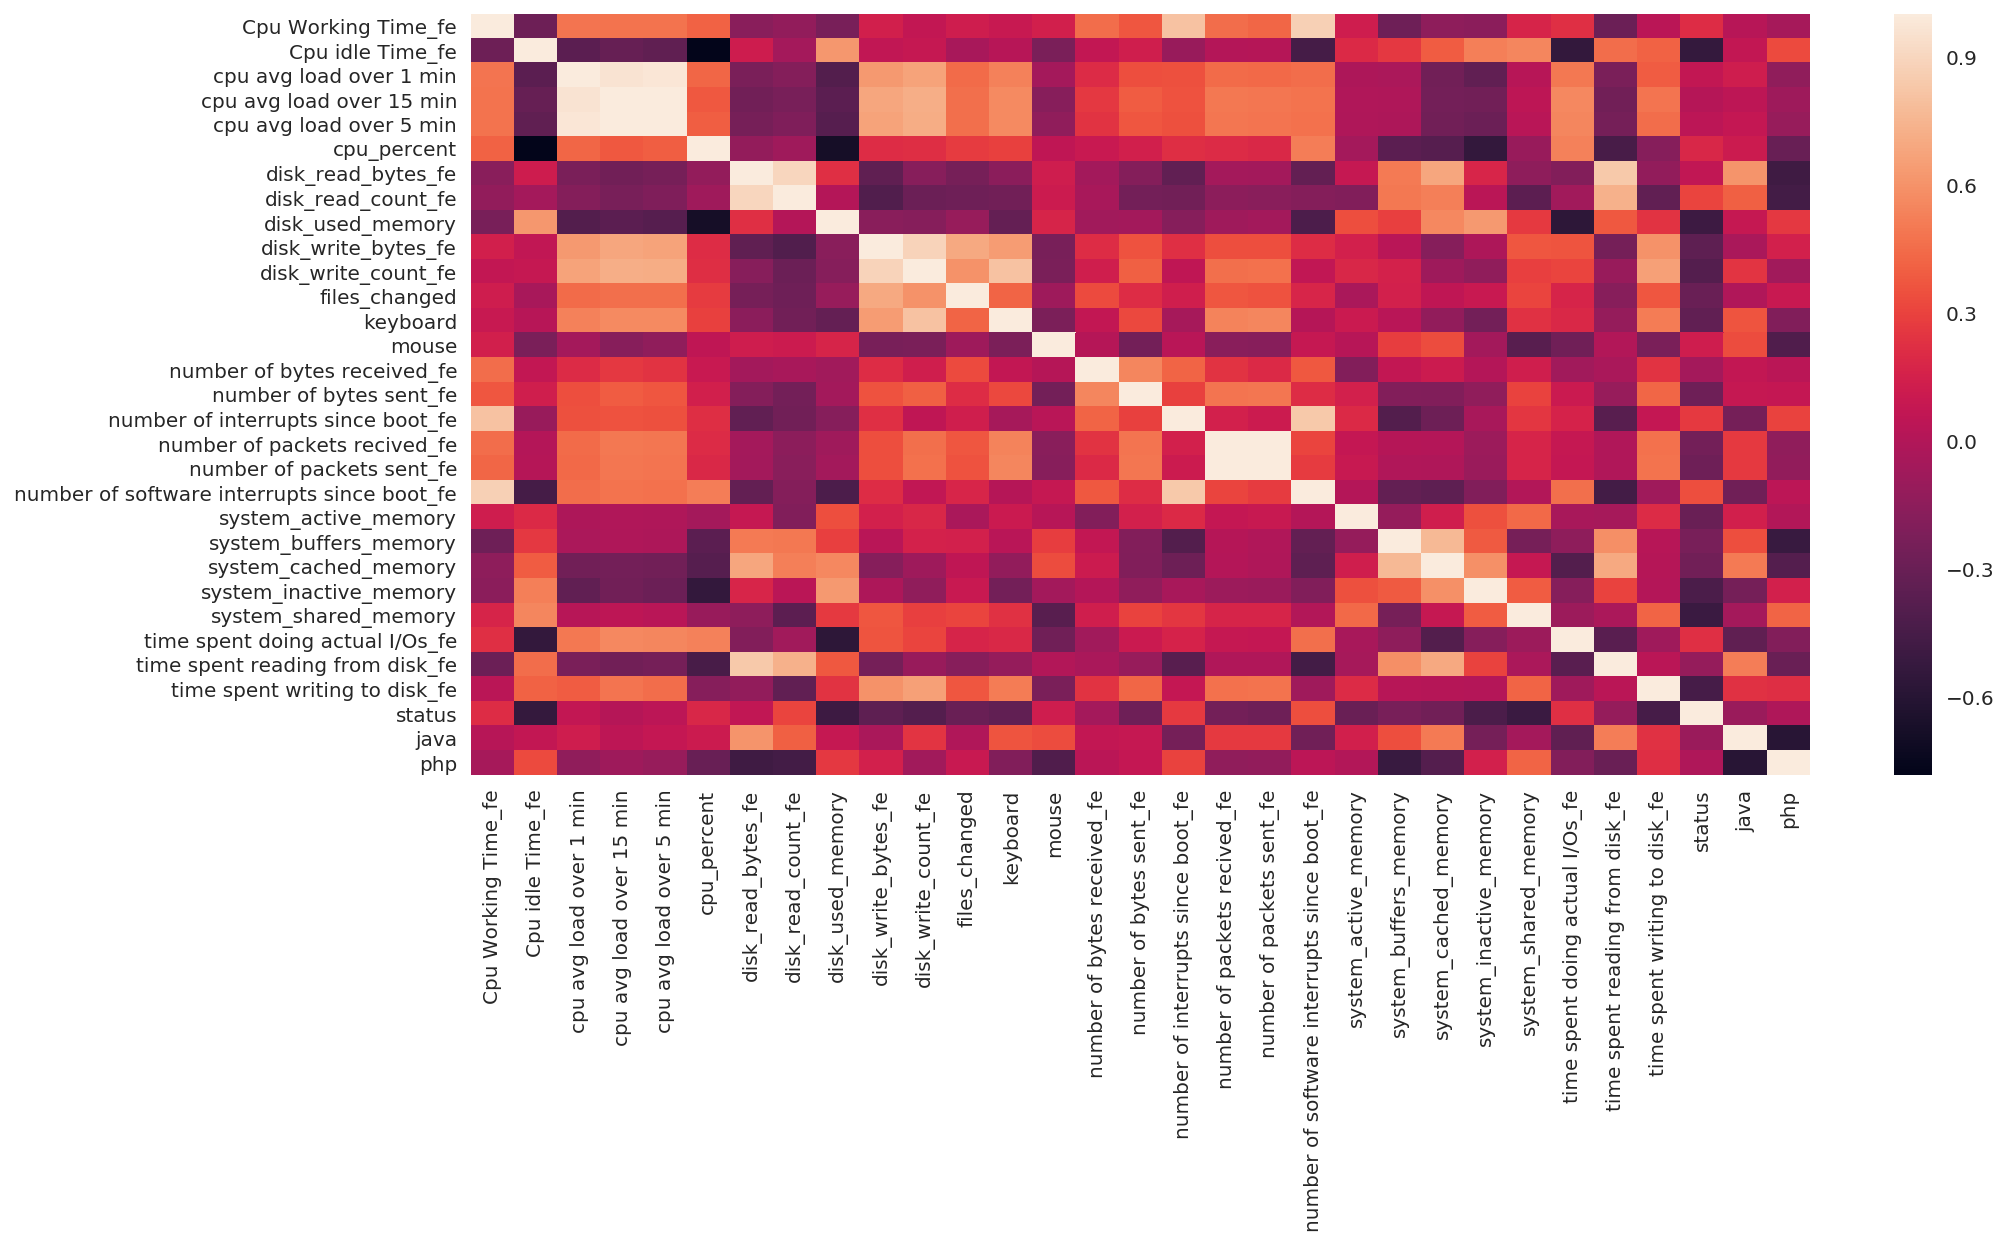

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(avg_df.corr())

In [12]:
corrs=avg_df.corr()['status']
high_corr_cols=[]
for each in corrs.index:
    if corrs[each]>0:
        high_corr_cols.append(each)

In [13]:
high_corr_cols

['Cpu Working Time_fe',
 'cpu avg load over 1 min',
 'cpu avg load over 15 min',
 'cpu avg load over 5 min',
 'cpu_percent',
 'disk_read_bytes_fe',
 'disk_read_count_fe',
 'mouse',
 'number of interrupts since boot_fe',
 'number of software interrupts since boot_fe',
 'time spent doing actual I/Os_fe',
 'status']

In [9]:
final_df.shape

(4761, 35)

In [ ]:
new_data.shape

In [102]:
one_hot_encoded_cols=final_df['technology'].unique()

In [ ]:
new_data.head()

In [ ]:
def one_hot_techo(df):
    le = LabelEncoder()
    oe = OneHotEncoder()
    tech_nums=le.fit_transform(df['technology'])
    oe.fit(np.array(tech_nums).reshape(-1, 1))
    abc = oe.transform(np.array(tech_nums).reshape(-1, 1)).toarray()
    techs=data['technology'].unique()
    techs.sort()
    print(techs)
    for index in range(len(techs)):
        if index<(len(techs)-1):
            df[techs[index]]=abc[:,index]
    
    return df
new=one_hot_techo(new_data)

In [39]:
len(techs)

3

In [7]:
new_data['Dates'] = list(final_df['Dates'])
new_data['user_name'] = list(final_df['user_name'])
new_data['Time'] = list(final_df['Time'])

In [69]:
# new_data.user_name.value_counts()

In [68]:
# target = (np.sqrt((df['Humidity'])))
# print ('Skewness is', target.skew())
# sns.distplot(target)
# new_data.dtypes

In [7]:
# for i in range(1,len(final_df.columns)):
#         if final_df[final_df.columns[i]].dtype != 'object':
#             plt.figure(figsize=(9,4))
#             final_df.plot(x="Time",y=final_df.columns[i],kind='line',figsize=(9,4))

In [9]:
def visualization(data):
    dt = data[data['user_name']=="markfernandes66@gmail.com"]
    dt2 = dt[dt['Dates']==dt['Dates'].unique()[0]]
    
    for i in range(1,len(dt2.columns)):
        if dt2[dt2.columns[i]].dtype != 'object':
            print(dt2.columns[i])
#             plt.figure(figsize=(15,7))
#             sb.lineplot(x='Time', y=dt2.columns[i], data=dt2)
            dt2.plot(x="Time",y=dt2.columns[i],kind = 'line',figsize=(9,4))
#             plt.xticks(rotation=90)
#             plt.show()
        
visualization(final_df)

In [10]:
final_df.head()

,Cpu Working Time_fe,Cpu idle Time_fe,DateTime,Dates,Time,boot_time,cpu avg load over 1 min,cpu avg load over 15 min,cpu avg load over 5 min,cpu_percent,...,system_buffers_memory,system_cached_memory,system_inactive_memory,system_shared_memory,technology,time spent doing actual I/Os_fe,time spent reading from disk_fe,time spent writing to disk_fe,user_name,status
0,4479.76,26409.62,2019-09-16 13:00:04,2019-09-16,13:00:04,2:20:17.708247,1.32,1.11,1.37,16.9,...,676397056,2870939648,2344497152,1114275840,php,1031580,6358960,11001744,sharlawar77@gmail.com,0
1,348.04,775.59,2019-09-16 13:05:04,2019-09-16,13:05:04,2:25:17.919877,2.84,1.36,1.88,45.9,...,675377152,2890579968,2335301632,1108217856,php,9196,8820,42816,sharlawar77@gmail.com,0
2,286.39,862.77,2019-09-16 13:10:05,2019-09-16,13:10:05,2:30:18.278005,1.37,1.42,1.61,44.0,...,675287040,2914869248,2328698880,1100492800,php,8920,9124,11444,sharlawar77@gmail.com,0
3,322.39,800.20,2019-09-16 13:15:05,2019-09-16,13:15:05,2:35:18.069087,1.60,1.56,1.72,58.5,...,661630976,2880077824,2342473728,1139384320,php,12776,12624,30312,sharlawar77@gmail.com,0
4,141.50,1004.08,2019-09-16 13:20:04,2019-09-16,13:20:04,2:40:17.588044,0.11,1.33,1.01,3.6,...,658649088,2864275456,2244440064,1086861312,php,11172,10928,43048,sharlawar77@gmail.com,0


In [17]:
!git reflog --date=iso

6621f96 (HEAD -> master) HEAD@{2019-09-20 18:52:08 +0530}: commit: preprocessing with one hot encoding
35c3f10 HEAD@{2019-09-09 12:24:26 +0530}: commit: just to test the gitlog working
5425dbc HEAD@{2019-09-09 12:24:04 +0530}: reset: moving to HEAD
5425dbc HEAD@{2019-09-09 12:23:41 +0530}: commit: just to test the gitlog working
0903625 (origin/master, origin/HEAD) HEAD@{2019-08-27 16:58:56 +0530}: commit: added server and application files to project
eb109f9 HEAD@{2019-08-27 16:49:14 +0530}: clone: from https://github.com/AkankshaKaple/CPU_interation_logs


In [14]:
# dt = data[data['user_name']=='bhagyashrichalke21@gmail.com']
# dt2 = dt[dt['Dates']==dt['Dates'].unique()]
# # dt['Dates'].unique()

In [28]:
# for col in final_df.columns:
#     if final_df[col].dtypes == 'object':
#         final_df.drop(columns=col, inplace=True)

In [29]:
# final_data.shape

In [30]:
# final_df.duplicated().sum()

In [1]:
# Remove the outlier from the whole dataset
# def remove_outlier(df):
#     low = .20
#     high = .80
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#     return df

# df= remove_outlier(final_df)
# # sb.boxplot(df)
# plt.figure(figsize=(15,7))
# # plt.xticks(rotation='vertical')
# s = df.boxplot()
# s.set_xticklabels(df.columns,rotation=90)

In [4]:
# df.isna().sum()

In [2]:
# from sklearn.preprocessing import StandardScaler 
# def std(data):
#     # standardize the data attributes
#     for col in data.columns:
#         if data[col].dtype == 'object':
#             data = data.drop(columns=col)
#     sc = StandardScaler()
#     standardized_X = sc.fit_transform(data)
#     new_data = pd.DataFrame(standardized_X, columns=data.columns)
    
#     return new_data
# new_data = std(df)

In [3]:
# from sklearn.cluster import KMeans
# wcss = []

# X = np.array(new_data)

# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X.reshape(-1,1))
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(new_data)
# new_data['y'] = y_kmeans

# sb.countplot(x=y_kmeans, data=new_data)


In [ ]:
# # sb.boxplot(final_df)
# from pandas.api.types import is_numeric_dtype
# def remove_outlier(df, name):
#     low = .25
#     high = .75
#     quant_df = df.quantile([low, high])
# #     for name in list(df.columns):
# #         if is_numeric_dtype(df[name]):
#     for i in range(len(df)):
#         if df[name].iloc[i]  > quant_df.loc[low, name] or df[name].iloc[i] < quant_df.loc[high, name]:
# #             print(df[name].iloc[i])
#             df[name].iloc[i] = np.average(df[name])
# #             print(df[name].iloc[i])
#     return df
# l = ['system_active_memory','disk_used_memory','system_inactive_memory','system_buffers_memory',
#        'system_cached_memory','system_shared_memory']
# # for i in l:
# #     print(i)
# df= remove_outlier(new_data,'system_active_memory')
# #     sb.boxplot(df)
# plt.figure(figsize=(15,7))
# plt.xticks(rotation='vertical')
# s = df.boxplot()
# s.set_xticklabels(df.columns,rotation=90)

In [ ]:
# low = .20
# high = .80
# name = 'system_active_memory'
# quant_df = df.quantile([low, high])
# print(quant_df.loc[low, name], quant_df.loc[high, name])
# np.average(new_data[name])

In [ ]:
# # Remove the outlier from the whole dataset
# def remove_outlier(df):
#     low = .25
#     high = .75
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             df[name] = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#     return df

# df= remove_outlier(new_data)
# plt.figure(figsize=(15,7))
# plt.xticks(rotation='vertical')
# s = df.boxplot()
# s.set_xticklabels(df.columns,rotation=90)

In [ ]:
# df['system_active_memory'], final_df['system_active_memory']
# for col in new_data.columns:
#     if new_data[col].isna():
#         new_data.drop(columns=col, inplace=True)

In [ ]:
# np.average(new_data['Cpu Working Time_fe'])

In [ ]:
# from sklearn.cluster import KMeans
# wcss = []

# X = np.array(new_data)

# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X.reshape(-1,1))
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(new_data)
# new_data['y'] = y_kmeans

# sb.countplot(x=y_kmeans, data=new_data)


In [1]:
# plt.figure(figsize=(10,10))
# cor = new_data.corr() #Calculate the correlation of the above variables
# sb.heatmap(cor, square = True) #Plot the correlation as heat map

In [ ]:
# df_cluster = final_df
# df_cluster.shape, final_df.shape
# d = final_df

In [ ]:
# kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(final_df)
# final_df['y'] = y_kmeans

# sb.countplot(x=y_kmeans, data=final_df)

In [ ]:
# plt.figure(figsize=(10,10))
# sb.heatmap(final_df.corr())

In [ ]:
# plt.figure(figsize=(15,8))
# sb.boxplot(data=final_df)
# plt.xticks(rotation=90)

In [ ]:
#import important libraries.
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from pandas.api.types import is_numeric_dtype
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
# def remove_outlier(df):
#     low = .25
#     high = .75
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#     return df

# df= remove_outlier(final_df)
# sns.boxplot(df)

In [ ]:
# for col in final_df.columns:
# #     plt.hist(x=col)
#     sb.distplot(final_df[col])
#     plt.xticks(rotation=90)
#     plt.show()

In [ ]:
# from sklearn.cluster import KMeans
# wcss = []
# X = np.array(final_df)

# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(final_df)
# final_df['y'] = y_kmeans

# sb.countplot(x=y_kmeans, data=final_df)
